# Comparison Sorting 

Comparison sort algorithms are lower bounded by O(nlog(n)) in terms of the computational complexity. This is because of the minumum height of the comparison models for sorting are lower bounded by O(nlog(n)).

Here the comparison sorting implementations include:
- Mergesort 
- Programming assignment (Problem 2-5)

## Mergesort

Merge sort achieves the lower bound of computational complexity for comparison sorting algorithms.

In [39]:
def merge_sort(A,a=0,b=None): #O(nlog(n))
    if b is None:
        b = len(A)
    if 1<b-a:
        c=(a+b+1)//2
        merge_sort(A,a,c)
        merge_sort(A,c,b)
        L,R=A[a:c],A[c:b]
        i,j=0,0
        while a<b:
            if (j>=len(R)) or (i<len(L) and L[i]<R[j]):
                A[a]=L[i]
                i+=1
            else:
                A[a]=R[j]
                j+=1
            a+=1

In [43]:
list1=[2,4,3,1,9,14,4,9,3,6,12]
print(list1)
merge_sort(list1)
print(list1)


[2, 4, 3, 1, 9, 14, 4, 9, 3, 6, 12]
[1, 2, 3, 3, 4, 4, 6, 9, 9, 12, 14]


## Programming assignment (Problem 2-5)

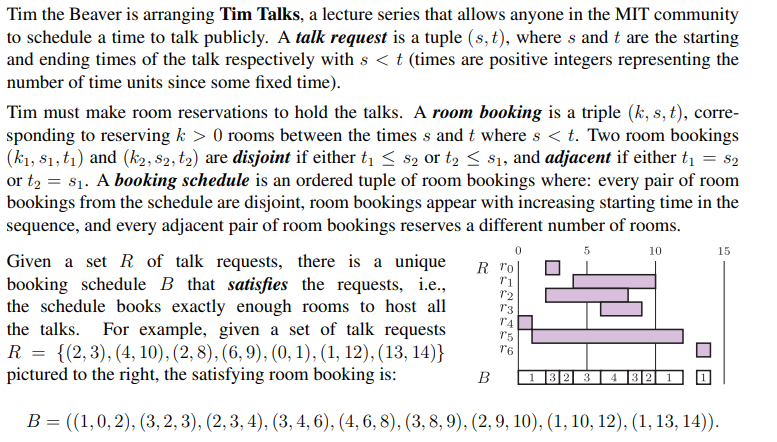

a) Given a set R of n talk requests, describe an O(n log n)-time algorithm to return the booking schedule that satisfies R.

- A list of tuples is created where each starting time (s) will transformed into a tuple like (s,1) with one repsenting the need for a room. Each ending time (t) will be transformed into a tuple like (t,-1) where -1 represents the release of a room. O(n)
- The transformed list of tuples will be sorted with mergsort based on the time values. O(nlog(n))
- As the time tuples are iterated through an accumulator variables sums with the 1 or -1 associated with each time tuple to keep track of the number of rooms required. At each point of the iteration a room booking list is appended with the tuple: (current_accumulator_value, current_time_val, next_time_val). O(n)
- Then adjacent room booking tuples that contain the same amount of rooms are merged together to form a longer room booking. O(n) 

b) Write a Python function satisfying booking(R) that implements your algorithm.

In [35]:
def merge_sort_booking(A,a=0,b=None): #B(nlog(n))
    if b is None:
        b = len(A)
    if 1<b-a:
        c=(a+b+1)//2
        merge_sort_booking(A,a,c)
        merge_sort_booking(A,c,b)
        L,R=A[a:c],A[c:b]
        i,j=0,0
        while a<b:
            if (j>=len(R)) or (i<len(L) and L[i][0]<R[j][0]):
                A[a]=L[i]
                i+=1
            else:
                A[a]=R[j]
                j+=1
            a+=1
            
def satisfying_booking(R):
    """
    Input:  R | Tuple of |R| talk request tuples (s, t)
    Output: room_booking | Tuple of room booking triples (k, s, t)
              | that is the booking schedule that satisfies R
   """
    B=[]
    room_booking = [] 
    Track=[]
    for s,t in R:
        Track.append((t,-1))
        Track.append((s,1))

        
    merge_sort_booking(Track) 
    acc=0
    #finding room booking per time interval
    for i in range(0,len(Track)-1):
        k=Track[i][1] #extracting operator 
        acc+=k
        if Track[i][0]!=Track[i+1][0] and acc!=0:
                room_booking.append((acc,Track[i][0],Track[i+1][0]))
    
    #merging adjacent time intervals
    b_old=room_booking[0]
    B=[b_old]
    for b_new in room_booking[1:]:
        if b_new[0]==b_old[0] and b_new[1]==b_old[2]:
            B[-1]=(b_old[0],b_old[1],b_new[2])
        else:
            B.append(b_new)
            b_old=b_new

    return B
    

    

In [36]:
R=((2,3),(4,10),(2,8),(6,9),(0,1),(1,12),(13,14))
B=satisfying_booking(R)
B

[(1, 0, 2),
 (3, 2, 3),
 (2, 3, 4),
 (3, 4, 6),
 (4, 6, 8),
 (3, 8, 9),
 (2, 9, 10),
 (1, 10, 12),
 (1, 13, 14)]

# To-do 
- Write notes on stability and inplace